In [1]:
# Data processing Imports
import pandas as pd
import numpy as np
import operator

# Models Imports
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost.sklearn import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
dataframe = pd.read_csv("dataset.csv")

# Part 1 : Preprocessing

<img src="https://drive.google.com/uc?id=1ae5yPCYFFqAQ7eDg-Qkwr5AqxHyHiZ2L">

By Looking at Column types we can Broadly classify entities as 



Screen ,Camera ,Body,Audio,SIM,Connectivity,Hardware,Software,Features,Extras

The Entites Those have No affect on Ratings are:
(Very High NULL Values and CrossTab Ratios)

    PhoneId,Also Known As,Architecture,
    Music,Brand,Launch Date,Loudspeaker,Model,
    Browser,Email,Display Colour,Ring Tone,Build Material
    SMS,Software Based Aperture,Video Player,SAR Value
    Screen to Body Ratio (claimed by the brand),Video Recording Features

In [3]:
#Drop Unecessary Features
drops = ["Also Known As", "Architecture", "Music", "Brand",
         "Build Material","Video Recording Features","SAR Value",
         "Launch Date", "Loudspeaker", "Model", "Browser",
         "Screen to Body Ratio (claimed by the brand)",
         "Email", "Display Colour", "Ring Tone", "SMS",
         "Software Based Aperture","Video Player","Video Recording"
         ,"Standby time","Wi-Fi","TalkTime","Custom UI",
         "Image Resolution","Screen Resolution","Autofocus"
         ,"Camera Features","SIM 1","SIM 2","SIM 3",
        "SIM Size","SIM Slot(s)","Sensor","USB Connectivity"]
dataframe=dataframe.drop(drops,axis=1)

# Data Cleaning and Filling Missing Values

In [4]:

# Cleaning Height mean=149
height=[]
for x in dataframe.Height.fillna("149 mm"):
    height.append(float(x.split(" mm")[0]))
dataframe.Height=height

#Cleaning Internal Memory most count =32 GB
internal=[]
for x in dataframe["Internal Memory"].fillna("32 GB"):
    internal.append(int(x.split(" ")[0]))
dataframe["Internal Memory"]=internal

# Cleaning Pixel Density mean = 336 ppi
pixels=[]
for x in dataframe["Pixel Density"].fillna("336 ppi"):
    pixels.append(int(x.split(" ppi")[0]))
dataframe["Pixel Density"]=pixels

# Cleaning Resolution Data count = 8 MP Front 
resolution=[]
for x in dataframe["Resolution"].fillna("8 MP Front Camera"):
    resolution.append(float(x.split(" MP")[0]))
dataframe["Resolution"]=resolution

# Cleaning Thickness Data mean=8.5 mm 
thick=[]
for x in dataframe["Thickness"].fillna("8.5 mm"):
    thick.append(float(x.split(" mm")[0]))
dataframe["Thickness"]=thick

#Cleaning Weight Data mean = 158 grams
weight=[]
for x in dataframe["Weight"].fillna("158 grams"):
    weight.append(float(x.split(" grams")[0]))
dataframe["Weight"]=weight

#Cleaning Width Data mean = 72.4 mm
width=[]
for x in dataframe["Width"].fillna("72.4 mm"):
    width.append(float(x.split(" mm")[0]))
dataframe["Width"]=width

#Cleaning Graphics data count = Adreno
graphics=[]
for x in dataframe["Graphics"].fillna("Adreno- "):
    graphics.append(x.split(" ")[0].split("-")[0])
dataframe["Graphics"]=graphics


#Cleaning Processor Data mode=Octa Core
c=list()
for x in dataframe.Processor.fillna("Octa core"):
    if x.split(" ")[0]=="Octa" or x.split(" ")[0]=="Quad":
        c.append(x.split(" ")[0])
    else:
        c.append("Rare")
dataframe.Processor=c

#Cleaning Chipset Data mode = Qualcomm Snapdragon
chipset=[]
for x in dataframe["Chipset"].fillna("Qualcomm Snapdragon"):
    chipset.append(x.split(" ")[0])
dataframe["Chipset"]=chipset

#Cleaning Capacity Data mean = 3149
capacity=list()
for x in dataframe["Capacity"].fillna("3149 mAh"):
    capacity.append(int(x.split(" ")[0]))
dataframe["Capacity"]=capacity

#Cleaning Expandable Memory Data
#We have changed 2 TB data to 512 for Noramal Distribution of data
l=list()
for x in dataframe["Expandable Memory"].fillna("No"):
    if x=="No":
        l.append(0)
    else:
        z= x.split(" ")[2]
        if z=="2":
            l.append(512)
        else:
            l.append(int(z))
dataframe["Expandable Memory"]=l

#Cleaning RAM Data mode = 3 GB
l=list()
for x in dataframe["RAM"].fillna('3 GB'):
    z=float(x.split(" ")[0])
    if z>8:
        l.append("Less")
    else:
        l.append(str(z))
dataframe["RAM"]=l

#Cleaning Screen to Body Ratio mean = 70.92 %
l=list()
for x in dataframe['Screen to Body Ratio (calculated)'].fillna('70.92%'):
    l.append(float(x.split("%")[0]))
dataframe["Screen to Body Ratio (calculated)"]=l

#Cleaning Screen Size mean = 5.33 inches
l=list()
for x in dataframe['Screen Size'].fillna('5.33 inches'):
    l.append(float(x.split(" inches")[0]))
dataframe["Screen Size"]=l

# Filling Type data mode = Li-ion
dataframe["Type"]=dataframe["Type"].fillna("Li-ion")

# Features
Combining Many Independent Features to Single Feature Column

In [5]:
features=["HDMI","Heart Rate Monitor","IRIS Scanner","Mobile High-Definition Link(MHL)","NFC","Games","FM Radio",
          "Java","Applications","Other Facilities","Other Sensors","Quick Charging","Phone Book",
          "Bluetooth","Special Features","Wireless Charging","Stylus","Flash","Colours","Audio Jack",
          "User Replaceable","Touch Screen","VoLTE","Optical Image Stabilisation","Audio Features",
           "Ruggedness","Co-Processor","Waterproof","USB OTG Support","USB Type-C","Bezel-less display"]
features_dataframe=dataframe.loc[:,features]

#Ratings
y=[]
for x in dataframe.Rating:
    if x > 4.0:
        y.append(1)
    else:
        y.append(0)
        
features_dataframe["Rating"]=y

#Colours
features_dataframe.Colours=features_dataframe.Colours.fillna("0")
c=list()
for x in features_dataframe.Colours:
    if x!="0":
        c.append(len(x.split(",")))
    else:
        c.append(0)
features_dataframe.Colours=c  

#Bluetooth
c=list()
features_dataframe.Bluetooth=features_dataframe.Bluetooth.fillna("No")
for x in features_dataframe.Bluetooth:
    if x=="v4.0" or x=="yes" or x=="v4.1" or x=="v4.2" or x=="v5.0":
        c.append(1)
    else:
        c.append(0)
features_dataframe.Bluetooth=c


changes=["Flash","Audio Jack","User Replaceable","Touch Screen","VoLTE","NFC","USB Type-C","Bezel-less display","FM Radio",
         "Optical Image Stabilisation","Audio Features","Applications","Waterproof","Ruggedness","Other Facilities",
         "Phone Book","Wireless Charging","Games","Co-Processor","HDMI","Special Features","Heart Rate Monitor"
         ,"IRIS Scanner","Mobile High-Definition Link(MHL)","Stylus","Quick Charging","Other Sensors","Java","USB OTG Support"]
for z in changes:
    features_dataframe[z]=features_dataframe[z].fillna("No")
    c=[]
    for x in features_dataframe[z]:
        if x == "No":
            c.append(0)
        else:
            c.append(1)
    features_dataframe[z]=c

f=features_dataframe
for x in features:
    f[x]=features_dataframe[x]*features_dataframe.corr().Rating[x]
f["Sum"] = f.sum(axis=1)

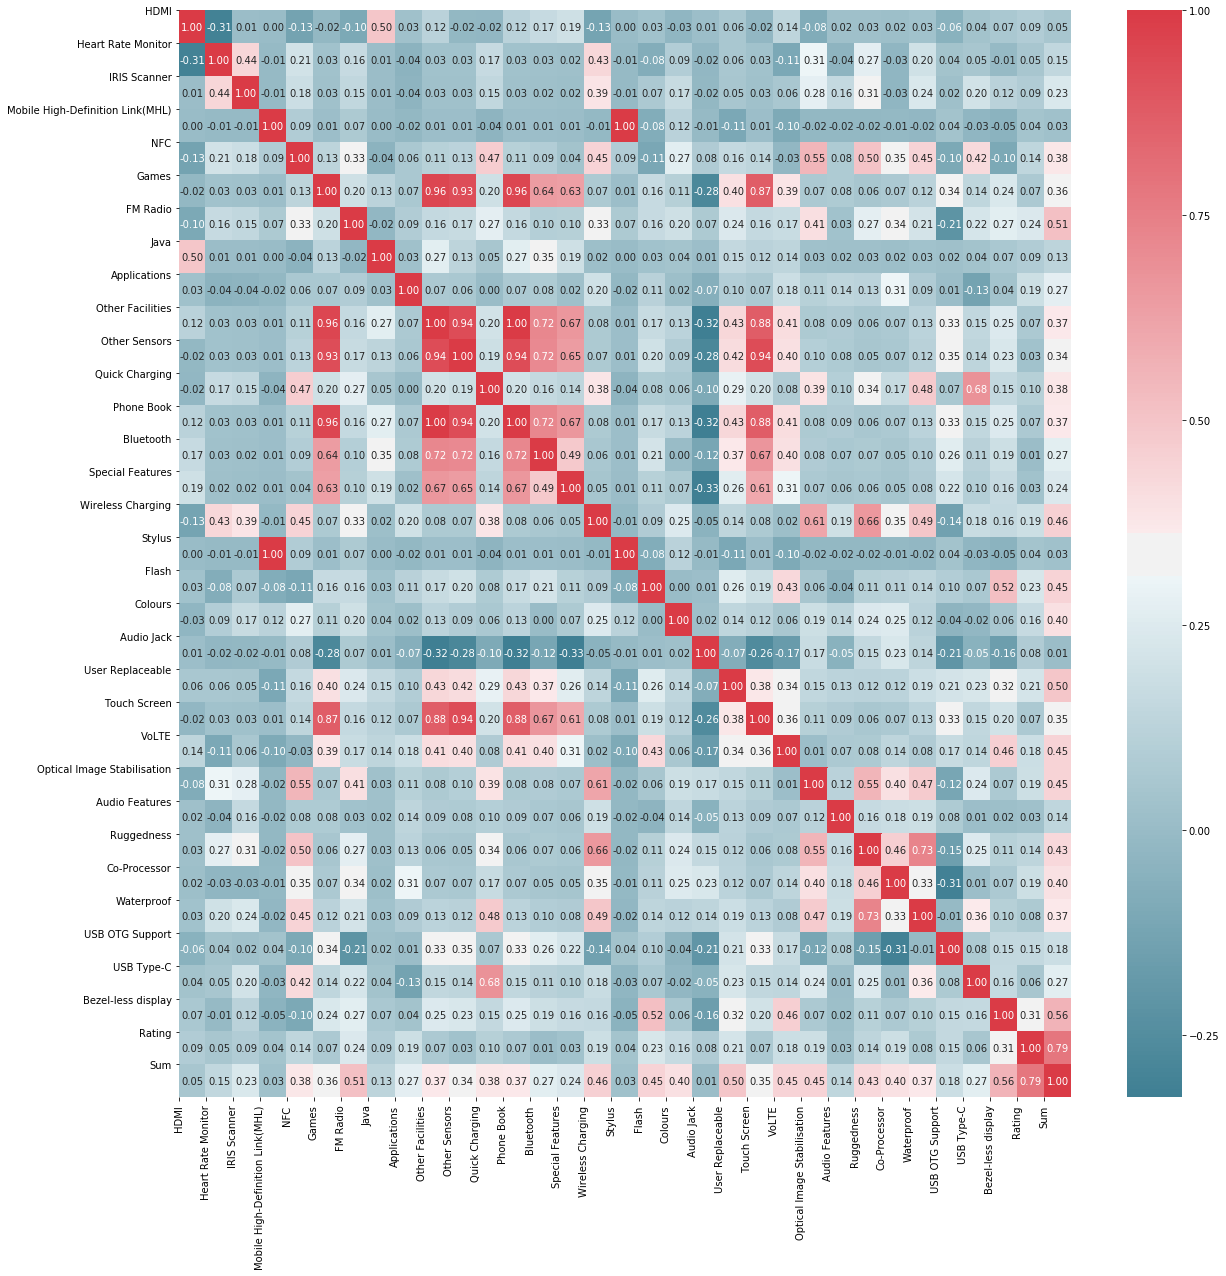

In [6]:
corr = f.corr()
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

#### New Sum Column had a greater correlation than other Features with rating so Our Hypothesis Works

In [7]:
#Removing all extra Features and adding Sum
dataframe=dataframe.drop(features,axis=1)

In [8]:
dataframe["ExtraFeatures"]=f.Sum

##### We Can See that Internal Memory and User Available Memory Have a High Correlation

From the given Data of User Available Memory we can determine the percentage of User available Memory for each Internal Memory Class and Drop Internal Memory

<img src="https://drive.google.com/uc?id=1H83DArqI_lXkXlRtvTuU75ztBuOPJ6OB">

**This Analysis is Done Using Excel**

In [9]:
l=list()
for x in dataframe["Internal Memory"]:
    if x==4:
        l.append(2.0)
    elif x==8:
        l.append(4.82)
    elif x==16:
        l.append(9.90)
    elif x==32:
        l.append(23.15)
    elif x==64:
        l.append(51.64)
    elif x==128:
        l.append(111.40)
    elif x==256:
        l.append(243.46)
    else:
        l.append(x*0.725)
dataframe["User Available Storage"]=l
dataframe=dataframe.drop(["Internal Memory"],axis=1)

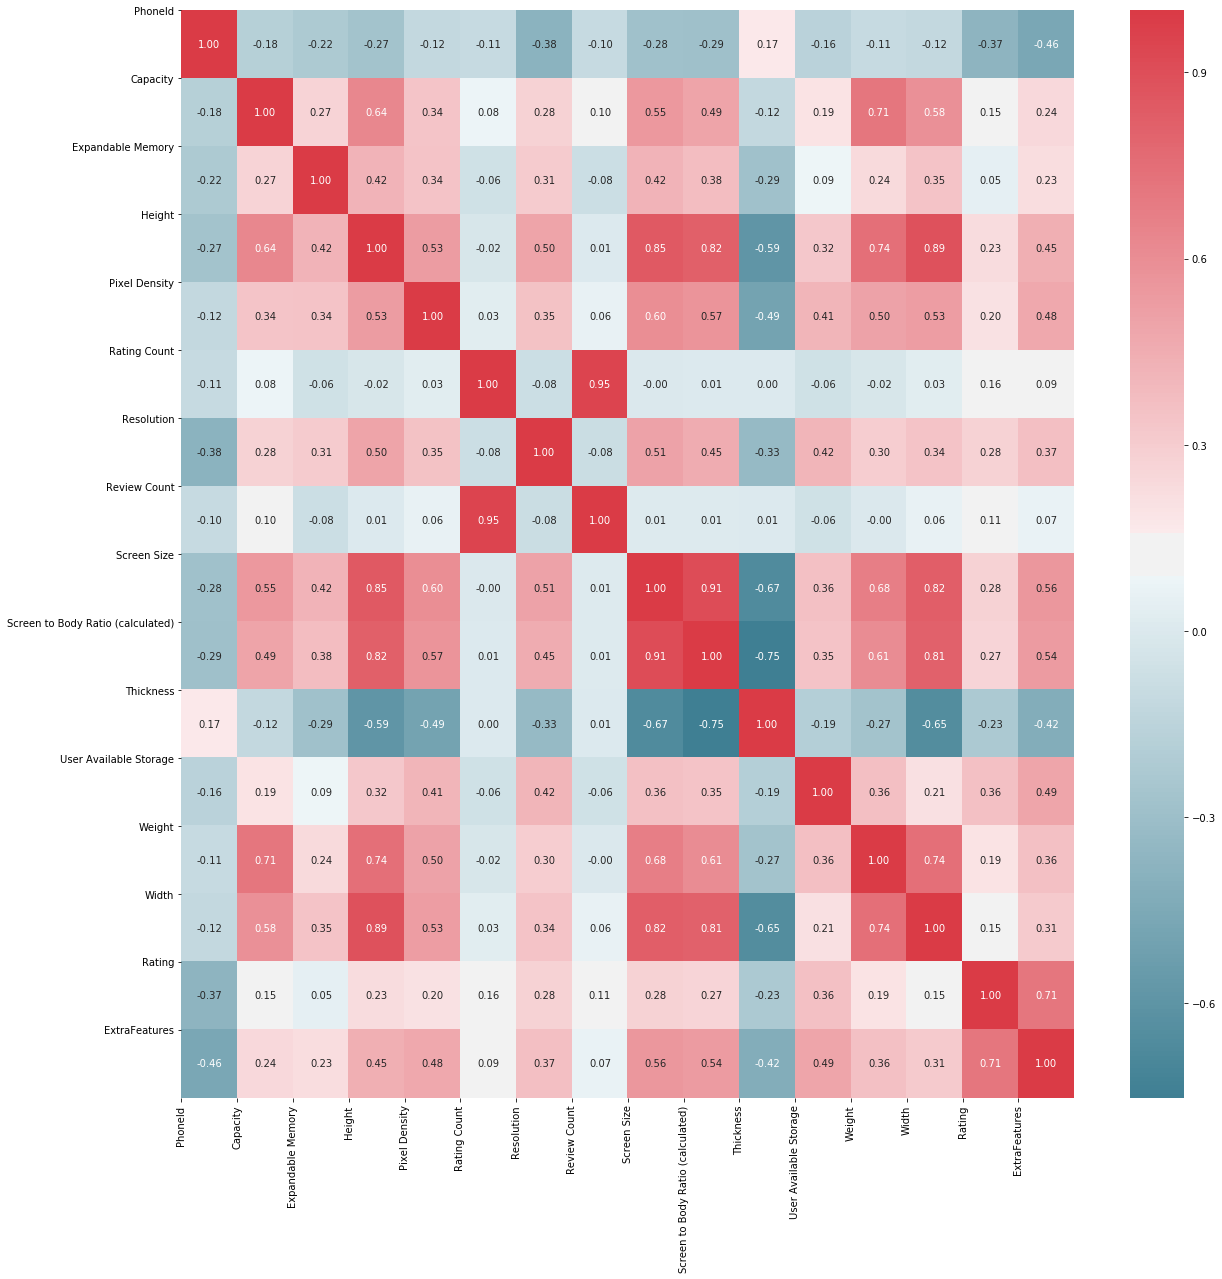

In [10]:
corr = dataframe.corr()
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

#### Checking if Adding Review Count and Rating Count have an effect on Correlation with Rating

In [11]:
#Merging Review And Rating counts and Checking the Hypothesis
dataframe["Review+Rating count"]=np.log2(dataframe["Review Count"]+dataframe["Rating Count"])


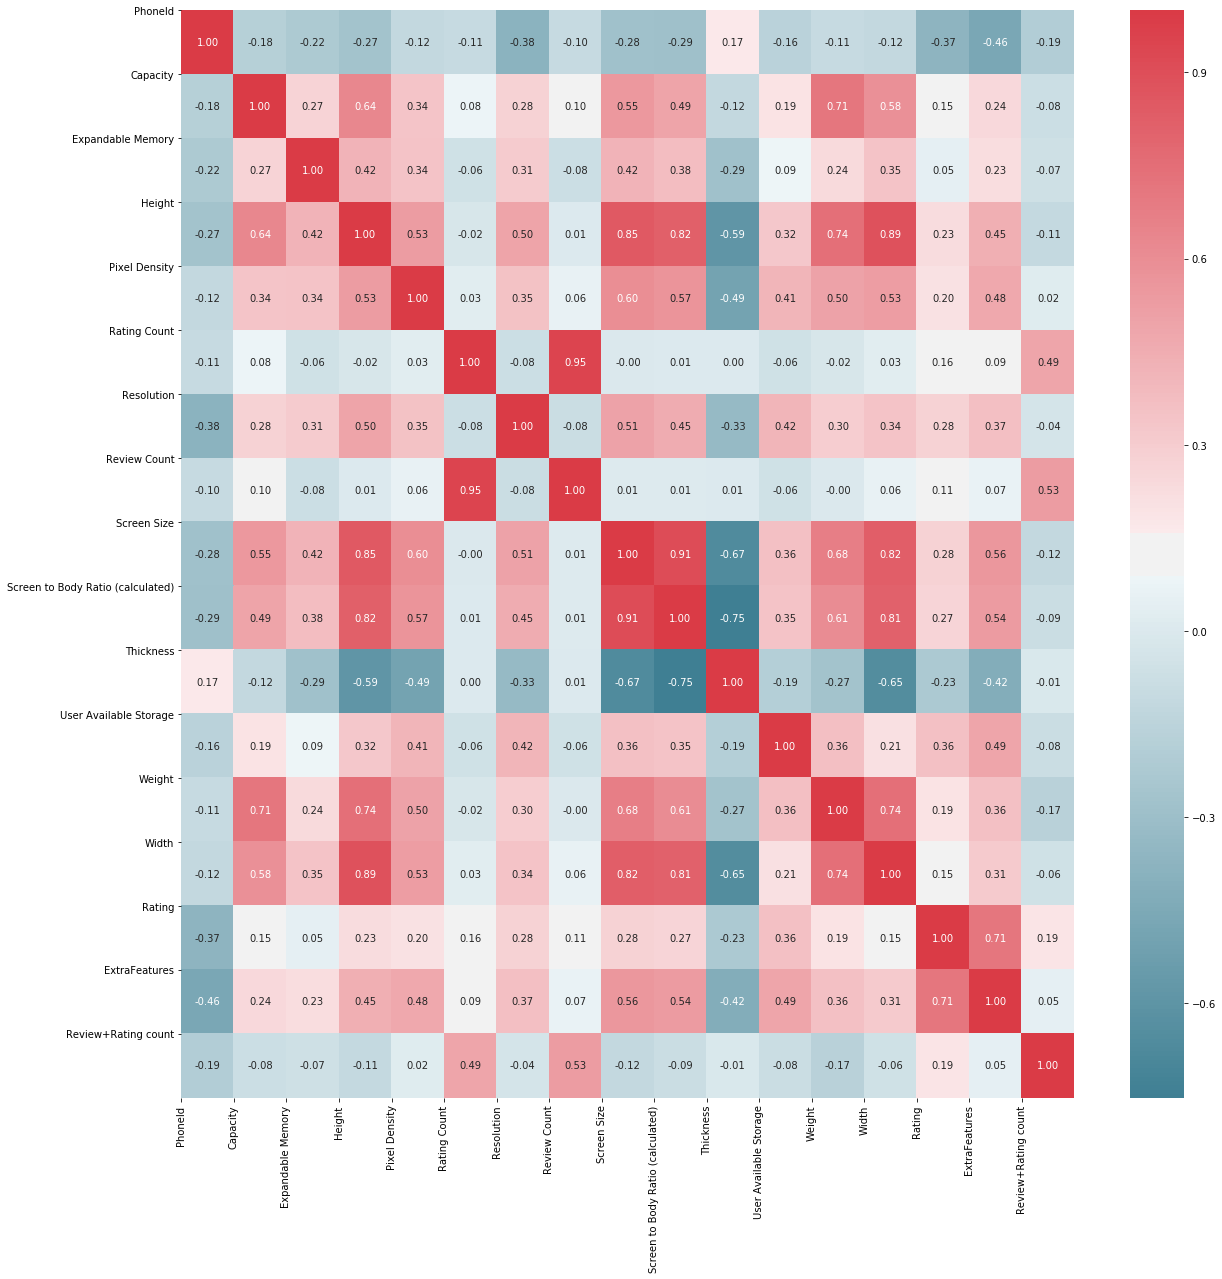

In [12]:
corr = dataframe.corr()
fig, ax = plt.subplots(figsize=(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

#### As the Combined column had a Greater Correlation Than Individual Column we can Drop Those features


In [13]:
dataframe=dataframe.drop(["Review Count","Rating Count"],axis=1)

##### It can be Observed in FingerPrint and FingerPrint Position Data that when Finger Print is "No" there are Nulls in Position so Dropping Fingerprint and Filling nulls in Position

In [14]:
dataframe["Fingerprint Sensor Position"]=dataframe["Fingerprint Sensor Position"].fillna("No")
dataframe=dataframe.drop(["Fingerprint Sensor"],axis=1)

### Reducing Number of Categories of data in Categorical Features

In [15]:
l=list()
for x in dataframe["Display Type"].fillna("IPS LCD"):
    if x in ['IPS LCD','TFT','Super AMOLED','OLED']:
        l.append(x)
    else:
        l.append("Rare")
dataframe["Display Type"]=l

l=list()
for x in dataframe["Operating System"].fillna("Android v8.1 (Oreo)"):
    if x in ['Android v8.1 (Oreo)','Android v6.0 (Marshmallow)',
             'Android v7.0 (Nougat)','Android v8.0 (Oreo)','Android v5.1 (Lollipop)',
            'Android v7.1.1 (Nougat)','Android v7.1 (Nougat)','Android v7.1.2 (Nougat)','Android v6.0.1 (Marshmallow)']:
        l.append(x)
    else:
        l.append("Rare")
dataframe["Operating System"]=l

l=list()
for x in dataframe["Physical Aperture"].fillna("F2.0"):
    if x in ['F2.0','F2.2',
             'F1.9','F2.4']:
        l.append(x)
    else:
        l.append("Rare")
dataframe["Physical Aperture"]=l
        

### Filling Missing Values as data not available

In [16]:
dataframe["Screen Protection"]=dataframe["Screen Protection"].fillna("-1")
dataframe["GPS"]=dataframe["GPS"].fillna("-1")
dataframe["Aspect Ratio"]=dataframe["Aspect Ratio"].fillna("-1")
dataframe["Settings"]=dataframe["Settings"].fillna("-1")
dataframe["Shooting Modes"]=dataframe["Shooting Modes"].fillna("-1")
dataframe["Wi-Fi Features"]=dataframe["Wi-Fi Features"].fillna("-1")

##### By Network and Network Support Contain Similar Data Features so We can Drop Network Data Process Network Support Data

In [17]:
dataframe=dataframe.drop(["Network"],axis=1)
l=list()
for x in dataframe["Network Support"].fillna("4G "):
    l.append(x.split(" ")[0])
dataframe["Network Support"]=l

# Part 2 : Model Fitting

### Ratings are Converted to Binary with threshold at 4.0

In [18]:
l=list()
for x in dataframe.Rating:
    if x<4:
        l.append(0)
    else:
        l.append(1)
dataframe.Rating=l

In [19]:
le=LabelEncoder()
ss=StandardScaler()

In [20]:
catergorical=["Aspect Ratio","Chipset",'Display Type','Fingerprint Sensor Position','GPS','Graphics','Network Support','Operating System','Physical Aperture','Processor','RAM','Screen Protection','Settings','Shooting Modes','Type','Expandable Memory','Wi-Fi Features']
le=LabelEncoder()
for x in catergorical:
    dataframe[x]=le.fit_transform(dataframe[x])

In [21]:
continous = ["Capacity",'Expandable Memory','Height','Pixel Density',"Screen Size",'Screen to Body Ratio (calculated)', 'Settings',
       'Thickness', 'User Available Storage', 'Weight', 'Width', 'ExtraFeatures']
ss=StandardScaler()
for x in continous:
    dataframe[x]=ss.fit_transform(np.array(dataframe[x]).reshape(-1,1))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

In [22]:
X=dataframe.drop(["PhoneId","Rating"],axis=1)
Y=np.array(dataframe.loc[:355,["Rating"]]).ravel()

In [23]:
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    gaussian_process.GaussianProcessClassifier(),
    
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    neighbors.KNeighborsClassifier(),
    
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
        
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = Y
row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, X, Y, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    alg.fit(X,Y)
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.992453,0.843925,0.0783543,0.010574
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.991509,0.842056,0.0757009,0.00778561
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.896698,0.841121,0.0912831,0.00373862
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.898585,0.837383,0.0996807,0.00408702
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.904245,0.834579,0.0921829,0.0112242
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",1,0.828037,0.107277,0.0527572
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.997642,0.827103,0.0712061,0.0889796
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.913208,0.825234,0.070985,0.272757
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.815888,0.108625,0.00230064
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.999528,0.813084,0.108588,0.040523


# Metrics

Comparing Different models and Maximizing Accuracy

Text(0, 0.5, 'Algorithm')

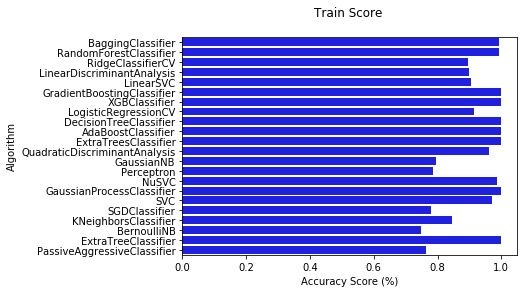

In [24]:
sns.barplot(x='MLA Train Accuracy Mean', y = 'MLA Name', data = MLA_compare,color="b")
plt.title('Train Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

Text(0, 0.5, 'Algorithm')

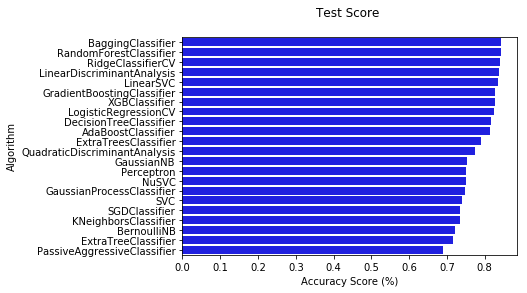

In [25]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare,color="b")
plt.title('Test Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### As we can See Bagging Classifier has the Maximum Accuracy among all Models ,Hence we will use it as base model

In [26]:
model  =ensemble.BaggingClassifier()

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
model.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [29]:
model.score(X_train,y_train)

0.9915611814345991

In [30]:
y_pred = model.predict(X_test)

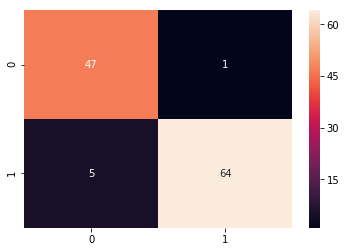

In [31]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True)

In [32]:
metrics.accuracy_score(y_test,y_pred)

0.9487179487179487

## As we Can See from the Above Metrics Maximum Accuracy of 94% is Achieved